Đề 50

# Dạng bình thường

In [590]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [591]:
df = pd.read_csv("../../Data/insurance.csv")

In [592]:
print("Số bản ghi: ",df.shape[0])
print("Số thuộc tính: ",df.shape[1])
print("-"*10)
print("10 dòng dữ liệu đầu tiên")
df.head(10)

Số bản ghi:  1338
Số thuộc tính:  7
----------
10 dòng dữ liệu đầu tiên


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [593]:
print("Kiểm tra các giá trị khuyết thiếu")
print("-"*10)
df.info()
print("-"*10)
print("Do số Non-Null Count của tất cả thuộc tính \nđều bằng số dòng hiện có nên không cần thực hiện xóa")

Kiểm tra các giá trị khuyết thiếu
----------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
----------
Do số Non-Null Count của tất cả thuộc tính 
đều bằng số dòng hiện có nên không cần thực hiện xóa


In [594]:
print("Giá trị lớn nhất của tuổi: ", df.age.max())
print("Giá trị lớn nhất của phí trả: ", df.charges.max())
print("Kiểm tra lại bằng thống kê mô tả: \n", df[['age','charges']].describe().loc[['max']])

Giá trị lớn nhất của tuổi:  64
Giá trị lớn nhất của phí trả:  63770.42801
Kiểm tra lại bằng thống kê mô tả: 
       age      charges
max  64.0  63770.42801


In [595]:
df_sct = df[df.sex == 'female'][['children','charges']]

In [596]:
z = np.abs(stats.zscore(df_sct))
df_sct = df_sct[(z<3).all(axis=1)]

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

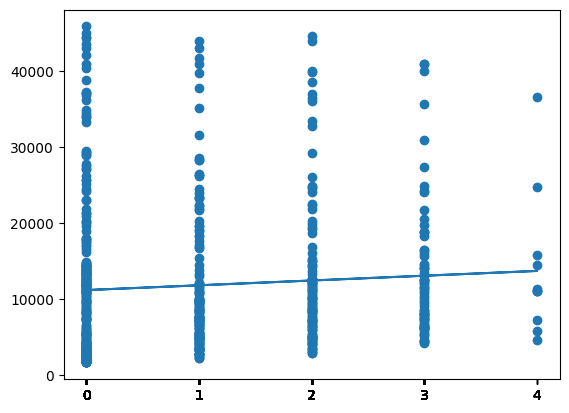

In [597]:
plt.scatter(df_sct.children, df_sct.charges)
slope, intercept = np.polyfit(df_sct.children,df_sct.charges,deg=1)
plt.plot(df_sct.children, slope*df_sct.children+intercept)
plt.xticks(df_sct.children)
plt.plot

# Huấn luyện mô hình (Label Encoding)

In [598]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [599]:
df_cus = df[df.children == 0].drop(['children'], axis=1)

In [600]:
from sklearn.preprocessing import LabelEncoder
lb_encode = LabelEncoder()

df_cus.sex = lb_encode.fit_transform(df_cus.sex)
df_cus.smoker = lb_encode.fit_transform(df_cus.smoker)
df_cus.region = lb_encode.fit_transform(df_cus.region)


In [601]:
df_cus.region

0       3
3       1
4       1
5       2
9       1
       ..
1331    3
1334    0
1335    2
1336    3
1337    1
Name: region, Length: 574, dtype: int32

In [602]:
df_cus.info()
df_cus.head(10)

<class 'pandas.core.frame.DataFrame'>
Index: 574 entries, 0 to 1337
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   age      574 non-null    int64  
 1   sex      574 non-null    int32  
 2   bmi      574 non-null    float64
 3   smoker   574 non-null    int32  
 4   region   574 non-null    int32  
 5   charges  574 non-null    float64
dtypes: float64(2), int32(3), int64(1)
memory usage: 24.7 KB


,age,sex,bmi,smoker,region,charges
0,19,0,27.900,1,3,16884.92400
3,33,1,22.705,0,1,21984.47061
4,32,1,28.880,0,1,3866.85520
5,31,0,25.740,0,2,3756.62160
9,60,0,25.840,0,1,28923.13692
10,25,1,26.220,0,0,2721.32080
11,62,0,26.290,1,2,27808.72510
12,23,1,34.400,0,3,1826.84300
13,56,0,39.820,0,2,11090.71780
14,27,1,42.130,1,2,39611.75770


In [622]:
X = df_cus.drop('bmi', axis=1)
y = df_cus.bmi

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
reg = LinearRegression()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
r_squared = reg.score(X_test, y_test)
rmse = mean_squared_error(y_test, y_pred, squared=True)
print("R^2: ", r_squared)
print("RMSE: ", rmse)

R^2:  0.04695762516375768
RMSE:  37.0580704740975


In [604]:
from sklearn.model_selection import cross_val_score, KFold

kf = KFold(n_splits=15, shuffle=True, random_state=42)
cv_score = cross_val_score(reg, X, y, cv=kf)
print(cv_score)

print(np.mean(cv_score))
print(np.std(cv_score))
print(np.quantile(cv_score,[0.025,0.975]))

[ 0.20853739  0.12736613  0.19810142  0.05824735 -0.02544056  0.1251478
  0.081201   -0.01202609 -0.07104589  0.04542972  0.19275921  0.13642276
 -0.29069562 -0.02570054  0.1319997 ]
0.05868691766676891
0.1262798612131461
[-0.21381822  0.2048848 ]


In [605]:
new_data = pd.DataFrame({"age":[32,27],"sex":[0,1],"smoker":[1,1],"region":[3,2],"charges":[2333.0,99.1]})
reg.predict(new_data)

array([24.20922502, 23.40394261])

In [644]:
df_cus['cor_age_bmi'] = df_cus.age*df_cus.bmi

In [646]:
X = df_cus.drop('bmi', axis=1)
y = df_cus.bmi

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)

reg.score(X_test, y_test)

0.8373304715637829

# Huấn luyện mô hình (One Hot Encoding)

In [647]:
from sklearn.preprocessing import OneHotEncoder

Lọc và lấy dữ liệu

In [838]:
df_cus = df[df.children == 0].drop(['children'], axis=1)
df_cus.info()

<class 'pandas.core.frame.DataFrame'>
Index: 574 entries, 0 to 1337
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   age      574 non-null    int64  
 1   sex      574 non-null    object 
 2   bmi      574 non-null    float64
 3   smoker   574 non-null    object 
 4   region   574 non-null    object 
 5   charges  574 non-null    float64
dtypes: float64(2), int64(1), object(3)
memory usage: 31.4+ KB


Chuẩn bị các giá trị cho Features dạng Categorical để mã hóa

In [839]:
df_cus_vl1 = df_cus.drop(['age','charges','bmi'], axis=1).values
X = df_cus_vl1[:, :].astype(str)

Đưa vào bộ mã hóa

In [840]:
ohe.fit(X)

e:\anaconda3\envs\dami\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


OneHotEncoder(handle_unknown='ignore', sparse=False, sparse_output=False)

Mã hóa Features và chuyển thành DataFrame để ghép với tập dữ liệu sau khi tách riêng các Features dạng Categorical

In [841]:
X = ohe.transform(X)
X = pd.DataFrame(X)

Đặt lại Index để nối cho khớp, tránh dư thừa

In [842]:
df_cus = df_cus.reset_index()

Ghép khớp Categorical Features và Numeric Features

In [843]:
new_df = pd.concat([df_cus[['age','charges','bmi']], X], axis=1)

Chuyển các tên cột sang string để đưa vào mô hình học máy

In [857]:
new_df.columns = new_df.columns.astype(str)

array(['age', 'charges', 'bmi', '0', '1', '2', '3', '4', '5', '6', '7'],
      dtype=object)

Train mô hình

In [964]:
X = new_df.drop('bmi', axis=1)
y = new_df.bmi

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(model.score(X_test,y_test))

0.19421554915442674


=> Quá thấp